In [140]:
# Import libraries
import pandas as pd
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

# Import credential
from credential import Arcgis_id

In [251]:
# Connect to ArcGIS
gis = GIS("https://utoronto.maps.arcgis.com", client_id = Arcgis_id)
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest//oauth2/authorize?response_type=code&client_id=fioWa2RXNLQcPGob&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=iivskyNzTz6ov88EQxFrWnpgKowNRl
Enter code obtained on signing in using SAML: ········


D:\Anaconda\software\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'utoronto.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Successfully logged in as: wangy216_utoronto


<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>
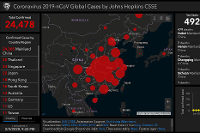

<Item title:"ncov_cases" type:Feature Layer Collection owner:CSSE_covid19>
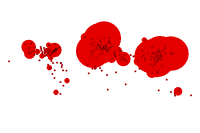

<Item title:"COVID-19 Cases US" type:Feature Layer Collection owner:CSSE_covid19>
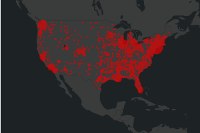

<Item title:"Coronavirus COVID-19 Cases V2" type:Feature Layer Collection owner:CSSE_covid19>
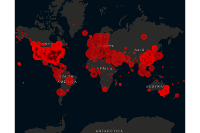

<Item title:"Dashboard Coronavirus COVID-19 (Mobile)" type:Dashboard owner:CSSE_covid19>
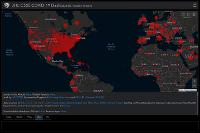

<Item title:"Coronavirus COVID-19 Cases" type:Feature Layer Collection owner:CSSE_covid19>
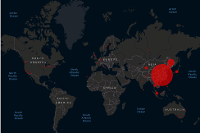

<Item title:"cases_time" type:Table Layer owner:CSSE_covid19>
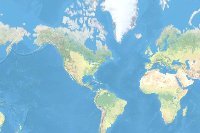

<Item title:"cases_time_v2" type:Table Layer owner:CSSE_covid19>
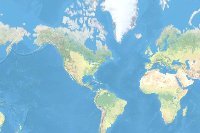

<Item title:"Test_COVID-19-Clone" type:Dashboard owner:CSSE_covid19>
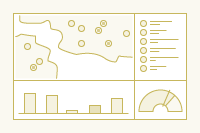

<Item title:"Test_COVID-19-Copy" type:Web Map owner:CSSE_covid19>
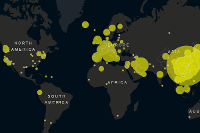

In [168]:
# Search for Covid-19 page
item = gis.content.search("owner:CSSE_covid19", outside_org=True)
for i in item:
    display(i)

In [170]:
item_need = item[0]

<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>
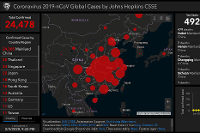

In [172]:
item_need

In [169]:
src_url = "https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1"
fl = FeatureLayer(url=src_url)

# China

In [179]:
# Get data for China
data_China = fl.query(where="Country_Region='China'")

In [180]:
# For a dataframe and remove NaN row & remove Hong Kong and Maucau which are not provinces
covid_China_df = data_China.sdf
covid_China_df = covid_China_df[["Province_State", "Lat", "Long_", "Confirmed", "Recovered", "Deaths", "Active", "SHAPE"]]
covid_China_df = covid_China_df.sort_values(["Province_State"], ascending = True).dropna(how = 'any', axis = 0)
covid_China_df = covid_China_df.drop(covid_China_df[covid_China_df["Province_State"].isin(["Hong Kong","Macau"])].index, axis = 0).reset_index(drop = True)
covid_China_df

,Province_State,Lat,Long_,Confirmed,Recovered,Deaths,Active,SHAPE
0,Anhui,31.8257,117.2264,1008,0,6,0,"{""x"": 117.22640000000001, ""y"": 31.825700000000..."
1,Beijing,40.1824,116.4142,1102,0,9,0,"{""x"": 116.41420000000005, ""y"": 40.182400000000..."
2,Chongqing,30.0572,107.8740,603,0,6,0,"{""x"": 107.87400000000008, ""y"": 30.057200000000..."
3,Fujian,26.0789,117.9874,754,0,1,0,"{""x"": 117.9874000000001, ""y"": 26.0789000000000..."
4,Gansu,35.7518,104.2861,199,0,2,0,"{""x"": 104.28610000000003, ""y"": 35.751800000000..."
5,Guangdong,23.3417,113.4244,2931,0,8,0,"{""x"": 113.4244000000001, ""y"": 23.3417000000000..."
6,Guangxi,23.8298,108.7881,277,0,2,0,"{""x"": 108.78810000000004, ""y"": 23.829800000000..."
7,Guizhou,26.8154,106.8748,147,0,2,0,"{""x"": 106.87480000000005, ""y"": 26.815400000000..."
8,Hainan,19.1959,109.7453,190,0,6,0,"{""x"": 109.74530000000004, ""y"": 19.195900000000..."
9,Hebei,37.8957,114.9042,1317,0,7,0,"{""x"": 114.90420000000006, ""y"": 37.895700000000..."


In [181]:
# Find the province mapping of China in Year 2020
china_province = gis.content.search(query="title:China Province Boundaries 2020", outside_org=True)
china_province

[<Item title:"China Prefecture Boundaries 2020" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Earthquake in Wenchuan, China in 2008" type:Web Map owner:yangyir3_utoronto>,
 <Item title:"China Country Boundary 2020" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"China Admin" type:Feature Layer Collection owner:Learn_ArcGIS>,
 <Item title:"China Province Boundaries 2020" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Intersect_of_China_Province_Boundaries_2020_and_Map_Notes_(Areas)" type:Feature Layer Collection owner:chwang_AU>,
 <Item title:"Aggregation_of_starbucks_new_wsj_to_China_Province_Boundaries_2020" type:Feature Layer Collection owner:u3581560_hkufbe>,
 <Item title:"China County Boundaries 2020" type:Feature Layer Collection owner:esri_dm>]

In [182]:
# Locate the id
china_map_id = china_province[4].id
china_map_id

'c4481e137e8040948af8df23aef11236'

<Item title:"China Province Boundaries 2020" type:Feature Layer Collection owner:esri_dm>
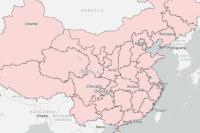

In [183]:
# Find the correct contents
provinces_info = gis.content.get(china_map_id)
provinces_info

In [185]:
# Generate province dataframe
province_flayer = provinces_info.layers[1]
province_df = province_flayer.query(as_df = True)
province_df = province_df.sort_values(["NAME"], ascending = True).reset_index(drop = True)
province_df

,OBJECTID,ID,NAME,AREA,TOTPOP_CY,ISO_CODE,ISO_SUB,ISO2_CC,ISO3_CC,Shape__Area,Shape__Length,SHAPE
0,12,340000,Anhui Province,1.401398e+05,65300583,CN34,34,CN,CHN,1.948299e+11,3.975894e+06,"{""rings"": [[[12960381.4004026, 4116501.4971849..."
1,1,110000,Beijing Municipality,1.653563e+04,22085178,CN11,11,CN,CHN,2.836374e+10,1.129408e+06,"{""rings"": [[[12985183.7171324, 5019922.2728419..."
2,22,500000,Chongqing Municipality,8.239946e+04,32003820,CN50,50,CN,CHN,1.104010e+11,3.630116e+06,"{""rings"": [[[12078979.9437013, 3789873.3314618..."
3,13,350000,Fujian Province,1.222053e+05,40643045,CN35,35,CN,CHN,1.521604e+11,6.446657e+06,"{""rings"": [[[13071320.7769909, 2701200.9548556..."
4,28,620000,Gansu Province,4.305301e+05,27159651,CN62,62,CN,CHN,6.948592e+11,1.025594e+07,"{""rings"": [[[10817152.4761758, 5280644.3493302..."
5,19,440000,Guangdong Province,1.782693e+05,117367654,CN44,44,CN,CHN,2.125200e+11,7.710194e+06,"{""rings"": [[[12308505.1052397, 2313774.5245445..."
6,20,450000,Guangxi Zhuang Autonomous Region,2.366935e+05,50814950,CN45,45,CN,CHN,2.842742e+11,5.441533e+06,"{""rings"": [[[12157798.4160702, 2380100.9471735..."
7,24,520000,Guizhou Province,1.760816e+05,37097421,CN52,52,CN,CHN,2.220434e+11,4.424678e+06,"{""rings"": [[[11974701.1880617, 3402153.2641808..."
8,21,460000,Hainan Province,3.412358e+04,9635717,CN46,46,CN,CHN,3.846554e+10,1.626545e+06,"{""rings"": [[[12209202.8062842, 2059439.6552163..."
9,3,130000,Hebei Province,1.879722e+05,77840081,CN13,13,CN,CHN,3.169639e+11,6.731170e+06,"{""rings"": [[[13186434.2718051, 4722776.9356497..."


In [189]:
# Sync the province names for the two dataframes and simplify dataframe
clean_name = []
for name in province_df["NAME"].str.split(" "):
    clean_name.append(name[0])
province_df["NAME"] = clean_name
province_df = province_df[["NAME", "AREA", "Shape__Area", "Shape__Length", "SHAPE"]]
province_df

,NAME,AREA,Shape__Area,Shape__Length,SHAPE
0,Anhui,1.401398e+05,1.948299e+11,3.975894e+06,"{""rings"": [[[12960381.4004026, 4116501.4971849..."
1,Beijing,1.653563e+04,2.836374e+10,1.129408e+06,"{""rings"": [[[12985183.7171324, 5019922.2728419..."
2,Chongqing,8.239946e+04,1.104010e+11,3.630116e+06,"{""rings"": [[[12078979.9437013, 3789873.3314618..."
3,Fujian,1.222053e+05,1.521604e+11,6.446657e+06,"{""rings"": [[[13071320.7769909, 2701200.9548556..."
4,Gansu,4.305301e+05,6.948592e+11,1.025594e+07,"{""rings"": [[[10817152.4761758, 5280644.3493302..."
5,Guangdong,1.782693e+05,2.125200e+11,7.710194e+06,"{""rings"": [[[12308505.1052397, 2313774.5245445..."
6,Guangxi,2.366935e+05,2.842742e+11,5.441533e+06,"{""rings"": [[[12157798.4160702, 2380100.9471735..."
7,Guizhou,1.760816e+05,2.220434e+11,4.424678e+06,"{""rings"": [[[11974701.1880617, 3402153.2641808..."
8,Hainan,3.412358e+04,3.846554e+10,1.626545e+06,"{""rings"": [[[12209202.8062842, 2059439.6552163..."
9,Hebei,1.879722e+05,3.169639e+11,6.731170e+06,"{""rings"": [[[13186434.2718051, 4722776.9356497..."


In [211]:
# Change the name of the special province "Inner Mongolia"
province_df.iloc[province_df[province_df["NAME"] == "Inner"].index, 0] = "Inner Mongolia"

D:\Anaconda\software\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [213]:
# Join two tables 
province_final_df = province_df.merge(covid_China_df, how = "inner", left_on = province_df["NAME"], right_on = covid_China_df["Province_State"])
province_final_df

,key_0,NAME,AREA,Shape__Area,Shape__Length,SHAPE_x,Province_State,Lat,Long_,Confirmed,Recovered,Deaths,Active,SHAPE_y
0,Anhui,Anhui,1.401398e+05,1.948299e+11,3.975894e+06,"{'rings': [[[12960381.4004026, 4116501.4971849...",Anhui,31.8257,117.2264,1008,0,6,0,"{'x': 117.22640000000001, 'y': 31.825700000000..."
1,Beijing,Beijing,1.653563e+04,2.836374e+10,1.129408e+06,"{'rings': [[[12985183.7171324, 5019922.2728419...",Beijing,40.1824,116.4142,1102,0,9,0,"{'x': 116.41420000000005, 'y': 40.182400000000..."
2,Chongqing,Chongqing,8.239946e+04,1.104010e+11,3.630116e+06,"{'rings': [[[12078979.9437013, 3789873.3314618...",Chongqing,30.0572,107.8740,603,0,6,0,"{'x': 107.87400000000008, 'y': 30.057200000000..."
3,Fujian,Fujian,1.222053e+05,1.521604e+11,6.446657e+06,"{'rings': [[[13071320.7769909, 2701200.9548556...",Fujian,26.0789,117.9874,754,0,1,0,"{'x': 117.9874000000001, 'y': 26.0789000000000..."
4,Gansu,Gansu,4.305301e+05,6.948592e+11,1.025594e+07,"{'rings': [[[10817152.4761758, 5280644.3493302...",Gansu,35.7518,104.2861,199,0,2,0,"{'x': 104.28610000000003, 'y': 35.751800000000..."
5,Guangdong,Guangdong,1.782693e+05,2.125200e+11,7.710194e+06,"{'rings': [[[12308505.1052397, 2313774.5245445...",Guangdong,23.3417,113.4244,2931,0,8,0,"{'x': 113.4244000000001, 'y': 23.3417000000000..."
6,Guangxi,Guangxi,2.366935e+05,2.842742e+11,5.441533e+06,"{'rings': [[[12157798.4160702, 2380100.9471735...",Guangxi,23.8298,108.7881,277,0,2,0,"{'x': 108.78810000000004, 'y': 23.829800000000..."
7,Guizhou,Guizhou,1.760816e+05,2.220434e+11,4.424678e+06,"{'rings': [[[11974701.1880617, 3402153.2641808...",Guizhou,26.8154,106.8748,147,0,2,0,"{'x': 106.87480000000005, 'y': 26.815400000000..."
8,Hainan,Hainan,3.412358e+04,3.846554e+10,1.626545e+06,"{'rings': [[[12209202.8062842, 2059439.6552163...",Hainan,19.1959,109.7453,190,0,6,0,"{'x': 109.74530000000004, 'y': 19.195900000000..."
9,Hebei,Hebei,1.879722e+05,3.169639e+11,6.731170e+06,"{'rings': [[[13186434.2718051, 4722776.9356497...",Hebei,37.8957,114.9042,1317,0,7,0,"{'x': 114.90420000000006, 'y': 37.895700000000..."


In [214]:
# Rename one of the Shape name
province_final_df = province_final_df.rename(mapper = {"index" : "Province", "SHAPE_x" : "SHAPE"}, axis = 1)

In [287]:
# Map for confirmed case in China
map_china = GIS().map("China")
map_china.clear_graphics()
province_final_df.spatial.plot(kind = 'map',
                               map_widget = map_china,
                              renderer_type = 'c',
                              methdo = 'esriClassifyNaturalBreaks',
                              class_count = 5,
                              col = 'Confirmed',
                              cmap = 'inferno',
                              alpha = 0.7)

# Add death cases layer in China map
map_china.add_layer(fl, {"type" : "FeatureLayer",
                            "renderer" : "ClassedSizeRenderer",
                            "field_name" : "Deaths"})
map_china.legend = True
map_china

MapView(layout=Layout(height='400px', width='100%'), legend=True)

# Canada

<Item title:"Provinces and Territories of Canada" type:Feature Layer Collection owner:esri_canada>
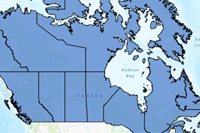

<Item title:"Provinces and Territories of Canada" type:Web Map owner:matts3223>
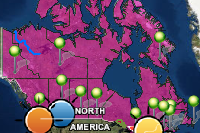

<Item title:"Map of Canada's Provinces and Territories" type:Web Map owner:lyncj3841>
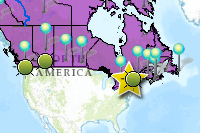

<Item title:"provinces of canada" type:Web Map owner:sreev4526>
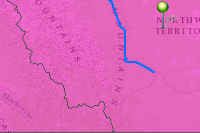

<Item title:"Homicide Rates and Median Age statistics by province; final copy" type:Web Map owner:Ethan.Rashid_Cocker@student.tdsb.on.ca_tdsbgeo>
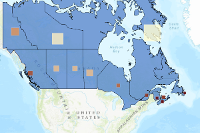

<Item title:"Provinces and Territories of Canada - copy" type:Feature Layer Collection owner:benjaminpiette>
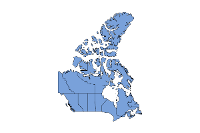

<Item title:"provinces and territories of Canada" type:Web Map owner:reidk48130>
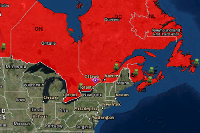

<Item title:"map of Canada-provinces and territories 2019-Copy" type:Web Map owner:hallm1689>
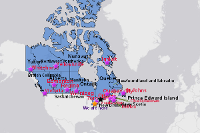

<Item title:"Map of Canada - Provinces and Territories 2019" type:Web Map owner:neild0911>
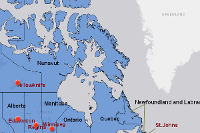

<Item title:"province and territories map of canada" type:Web Map owner:latfm2718>
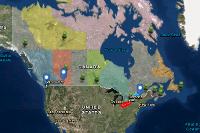

In [260]:
# Plot Canada map
# Search for Covid-19 page
item = gis.content.search("title:Provinces and Territories of Canada", outside_org=True)
for i in item:
    display(i)

In [261]:
# Select the map needed
canada_province_id = item[0].id

In [277]:
# Extract province dataframe and Simplify dataframe for Canada Province
canada_province_info = gis.content.get(canada_province_id)
province_layer_canada = canada_province_info.layers[0]
province_layer_canada_df = province_layer_canada.query(as_df = True)
province_layer_canada_df = province_layer_canada_df[["Name_EN", "Shape_Leng", "Shape_Area", "SHAPE"]]
province_layer_canada_df

,Name_EN,Shape_Leng,Shape_Area,SHAPE
0,Manitoba,7.174885e+06,1.987391e+12,"{""rings"": [[[-9901534.70535117, 7730176.501052..."
1,Saskatchewan,6.105909e+06,1.936261e+12,"{""rings"": [[[-11283826.6740758, 6273617.666091..."
2,Alberta,6.480084e+06,2.046155e+12,"{""rings"": [[[-12245068.4111107, 6273608.898894..."
3,British Columbia,2.995914e+07,2.864108e+12,"{""rings"": [[[-13718912.1255787, 6177039.990696..."
4,Nunavut,2.710973e+08,2.270183e+13,"{""rings"": [[[-8802092.92058305, 6735898.706205..."
5,Northwest Territories,5.378878e+07,8.759245e+12,"{""rings"": [[[-15146891.140271, 10790828.976773..."
6,Yukon,9.703122e+06,2.472298e+12,"{""rings"": [[[-15683844.2734605, 10948443.68825..."
7,Ontario,9.645718e+06,2.634173e+12,"{""rings"": [[[-8852214.91079477, 6615242.532552..."
8,Québec,2.857808e+07,4.296852e+12,"{""rings"": [[[-8230747.08357767, 5670496.658369..."
9,New Brunswick,3.044798e+06,1.541619e+11,"{""rings"": [[[-7432741.51518457, 5589409.025508..."


In [278]:
# Get covid data for Canada
data_Canada = fl.query(where="Country_Region='Canada'")
covid_Canada_df = data_Canada.sdf
covid_Canada_df = covid_Canada_df[["Province_State", "Lat", "Long_", "Confirmed", "Recovered", "Deaths", "Active"]]
covid_Canada_df

,Province_State,Lat,Long_,Confirmed,Recovered,Deaths,Active
0,Alberta,53.9333,-116.5765,237306,0,2330,0
1,British Columbia,53.7267,-127.6476,153313,0,1777,0
2,Diamond Princess,NaN,NaN,0,0,1,0
3,Grand Princess,NaN,NaN,13,0,0,0
4,Manitoba,53.7609,-98.8139,57891,0,1184,0
5,New Brunswick,46.5653,-66.4619,2447,0,46,0
6,Newfoundland and Labrador,53.1355,-57.6604,1443,0,7,0
7,Northwest Territories,64.8255,-124.8457,130,0,0,0
8,Nova Scotia,44.6820,-63.7443,5908,0,93,0
9,Nunavut,70.2998,-83.1076,657,0,4,0


In [282]:
# Merge two dataframe together
Canada_final_df = province_layer_canada_df.merge(covid_Canada_df, how = "left", left_on = province_layer_canada_df["Name_EN"], right_on = covid_Canada_df["Province_State"])
Canada_final_df

,key_0,Name_EN,Shape_Leng,Shape_Area,SHAPE,Province_State,Lat,Long_,Confirmed,Recovered,Deaths,Active
0,Manitoba,Manitoba,7.174885e+06,1.987391e+12,"{'rings': [[[-9901534.70535117, 7730176.501052...",Manitoba,53.7609,-98.8139,57891.0,0.0,1184.0,0.0
1,Saskatchewan,Saskatchewan,6.105909e+06,1.936261e+12,"{'rings': [[[-11283826.6740758, 6273617.666091...",Saskatchewan,52.9399,-106.4509,50679.0,0.0,584.0,0.0
2,Alberta,Alberta,6.480084e+06,2.046155e+12,"{'rings': [[[-12245068.4111107, 6273608.898894...",Alberta,53.9333,-116.5765,237306.0,0.0,2330.0,0.0
3,British Columbia,British Columbia,2.995914e+07,2.864108e+12,"{'rings': [[[-13718912.1255787, 6177039.990696...",British Columbia,53.7267,-127.6476,153313.0,0.0,1777.0,0.0
4,Nunavut,Nunavut,2.710973e+08,2.270183e+13,"{'rings': [[[-8802092.92058305, 6735898.706205...",Nunavut,70.2998,-83.1076,657.0,0.0,4.0,0.0
5,Northwest Territories,Northwest Territories,5.378878e+07,8.759245e+12,"{'rings': [[[-15146891.140271, 10790828.976773...",Northwest Territories,64.8255,-124.8457,130.0,0.0,0.0,0.0
6,Yukon,Yukon,9.703122e+06,2.472298e+12,"{'rings': [[[-15683844.2734605, 10948443.68825...",Yukon,64.2823,-135.0000,633.0,0.0,8.0,0.0
7,Ontario,Ontario,9.645718e+06,2.634173e+12,"{'rings': [[[-8852214.91079477, 6615242.532552...",Ontario,51.2538,-85.3232,560717.0,0.0,9360.0,0.0
8,Québec,Québec,2.857808e+07,4.296852e+12,"{'rings': [[[-8230747.08357767, 5670496.658369...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,New Brunswick,New Brunswick,3.044798e+06,1.541619e+11,"{'rings': [[[-7432741.51518457, 5589409.025508...",New Brunswick,46.5653,-66.4619,2447.0,0.0,46.0,0.0


In [290]:
# Map for confirmed case in Canada
map_canada = GIS().map("Canada")
map_canada.clear_graphics()
Canada_final_df.spatial.plot(kind = 'map',
                               map_widget = map_canada,
                              renderer_type = 'c',
                              methdo = 'esriClassifyNaturalBreaks',
                              class_count = 5,
                              col = 'Confirmed',
                              cmap = 'inferno',
                              alpha = 0.7)

# Add death cases layer in Canada map
map_canada.add_layer(fl, {"type" : "FeatureLayer",
                            "renderer" : "ClassedSizeRenderer",
                            "field_name" : "Deaths"})
map_canada.legend = True
map_canada

MapView(layout=Layout(height='400px', width='100%'), legend=True)